# Predicting Customer Churn behaviour in telecom industry using machine learning models

# Install Libraries

In [ ]:
# Provides a library for handling datasets with asymmetrical category distributions.
!pip install imbalanced-learn --quiet
# Sets up a well-known framework for gradient-based boosting in classification applications.
!pip install xgboost --quiet
# identifies an alternate boosting technique that performs well with a variety of data kinds.
!pip install catboost --quiet
# Introduces a tool that shows how each attribute influences model choices.
!pip install shap --quiet
# Obtains an application that uses local approximations to explain predictions.
!pip install lime --quiet

# Load Libraries

In [ ]:
# Provides fundamental array-handling capabilities for numerical operations.
import numpy as nmpy
# Supports loading structured data for table-based manipulation
import pandas as pnds
# Permits graphical summaries and charts to be produced visually.
import matplotlib.pyplot as mplt
# Provides simple drawing tools, particularly for statistical charts.
import seaborn as sbn
# Creates synthetic entries to add a method for rebalancing categories in datasets.
from imblearn.over_sampling import SMOTE
# Modifies the numeric columns to a constant, constrained range
from sklearn.preprocessing import MinMaxScaler
# Introduces a performance-based boosting-based learning framework
import xgboost as xgb
# Opens a different tree-based learner that is geared at speed and adaptability.
from catboost import CatBoostClassifier
# Offers a further boosting technique that is commonly applied in structured prediction
from sklearn.ensemble import GradientBoostingClassifier
# Offers instruments for evaluating the prediction system's performance in a number of areas, including accuracy, error rate balance, and class distinction.
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
# Offers techniques for assessing the general accuracy of forecasts, classifying prediction outcomes into specific groups, and producing an organized overview of model performance.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Provides the ability to reformat labels for compliance with particular algorithms, change the size of features to a consistent range, and transform non-numeric class labels into numerical form.
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
# Makes it possible to split the entire dataset into discrete sections, so that one portion can be used to evaluate prediction quality and the other to learn patterns.
from sklearn.model_selection import train_test_split
# Incorporates an instrument to deconstruct model outcomes into comprehensible components
import shap
# Introduces a function that uses locally interpretable logic to explain predictions.
import lime
# Provides tabular access to the framework for local explanations.
import lime.lime_tabular
# Stops the output of messages from being annoying while it's being executed
import warnings
# Silences superfluous warnings that might come up when running
warnings.filterwarnings('ignore')

In [ ]:
# Brings in functionality to access hosted file storage from an online workspace
from google.colab import drive
# Attaches the personal storage path to the virtual environment so that files can be accessed.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Pulls organized data from external storage and arranges it in tabular form for additional processing.
datafile_churn = pnds.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/telecom_customer_churn.csv')

In [ ]:
# Shows the dataset's initial entries to give an overview of its composition and structure.
datafile_churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Find the Null values and remove it

In [ ]:
# Verifies every characteristic to find any gaps and counts the number of records that are not complete.
datafile_churn.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


In [ ]:
# Examines each feature separately to ensure that missing data is handled properly.
for col in datafile_churn.columns:
  # If descriptive entries are present in the current attribute, substitute the most prevalent one for any missing portions.
  if datafile_churn[col].dtype == 'object':
    datafile_churn[col] = datafile_churn[col].fillna(datafile_churn[col].mode()[0])
  else:
    # In the event that the current characteristic is numerical, fill in the blanks with the normal average value.
    datafile_churn[col] = datafile_churn[col].fillna(datafile_churn[col].mean())

# Display the total amount of unfilled spaces that each feature still has.
datafile_churn.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


In [ ]:
# Show a brief preview of the dataset by displaying the first few entries.
datafile_churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Competitor,Competitor had better devices
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Competitor,Competitor had better devices
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
# Determine the dataset's total number of distinct elements, or cells.
datafile_churn.size

267634

In [ ]:
# Gives a brief summary of the table's structure, including the names of each feature, the number of valid entries, and the kind of data it contains (text or numbers).
datafile_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [ ]:
# Create statistical summaries for numerical columns like min, max, std, mean, and count.
datafile_churn.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,13.495231,17.334960,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,14.455000,15.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.420517,26.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [ ]:
# Display all of the dataset's rows and columns.
datafile_churn.shape

(7043, 38)

In [ ]:
# Since the identify column in the dataset is useless for modeling, remove it.
datafile_churn.drop(columns=["Customer ID"], inplace=True)

In [ ]:
# Converts the result feature into two groups, where one group represents clients who left the service, and the other comprises all remaining clients for easy classification.
datafile_churn['Churn'] = datafile_churn['Customer Status'].apply(lambda x: 0 if x == "Churned" else 1)
# Removes extra service termination-related descriptive fields that can add unnecessary information or have little predictive power.
datafile_churn.drop(columns=["Customer Status", "Churn Category", "Churn Reason"], inplace=True)

Correlation Heatmap

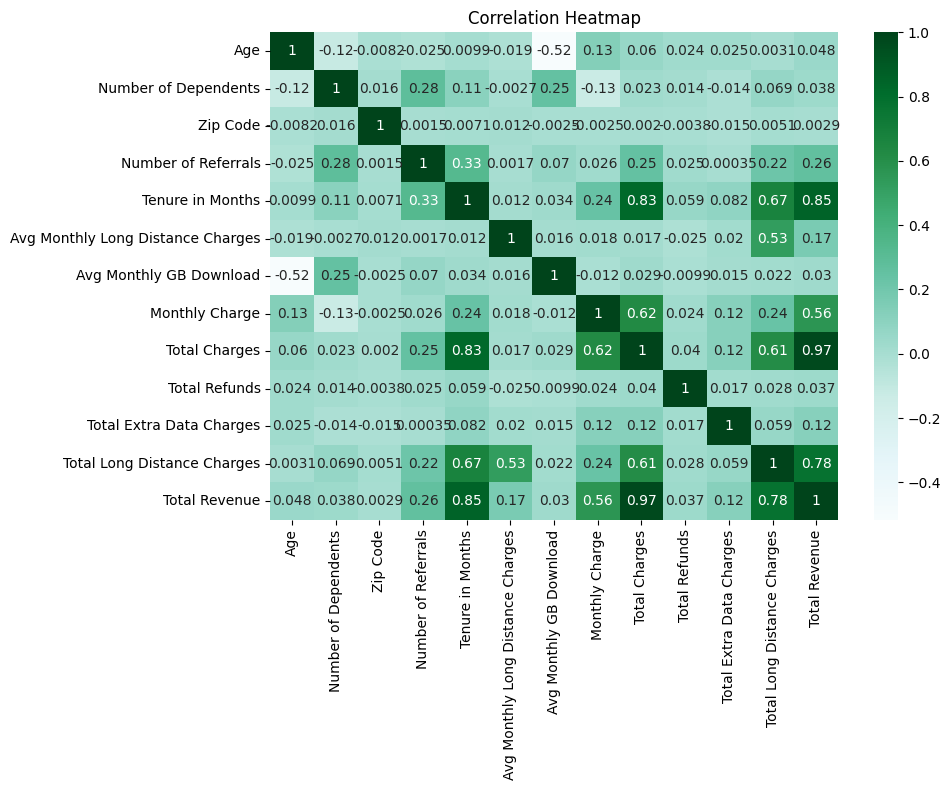

In [ ]:
# To guarantee that the focus is on numerical factors that potentially affect model performance without adding bias or leakage from location-based data, only the continuous and whole-number features from the entire dataset are retained, while the result label and geographical indicators are removed.
numeric_datafile = datafile_churn.select_dtypes(include=['int64', 'float64']).drop(['Churn','Latitude', 'Longitude'],axis=1)
# Determine linear correlations between every pair of numerical characteristics.
corr_matrix = numeric_datafile.corr()
# Define the visual output's dimensions.
mplt.figure(figsize=(10, 8))
# Create a square image that displays interdependencies and contains values.
sbn.heatmap(corr_matrix, annot=True, cmap='BuGn')
# Provide a heading for the image.
mplt.title('Correlation Heatmap')
# Make sure nothing gets cut off by adjusting the spacing.
mplt.tight_layout()
# Present the produced image
mplt.show()

Histogram Plots

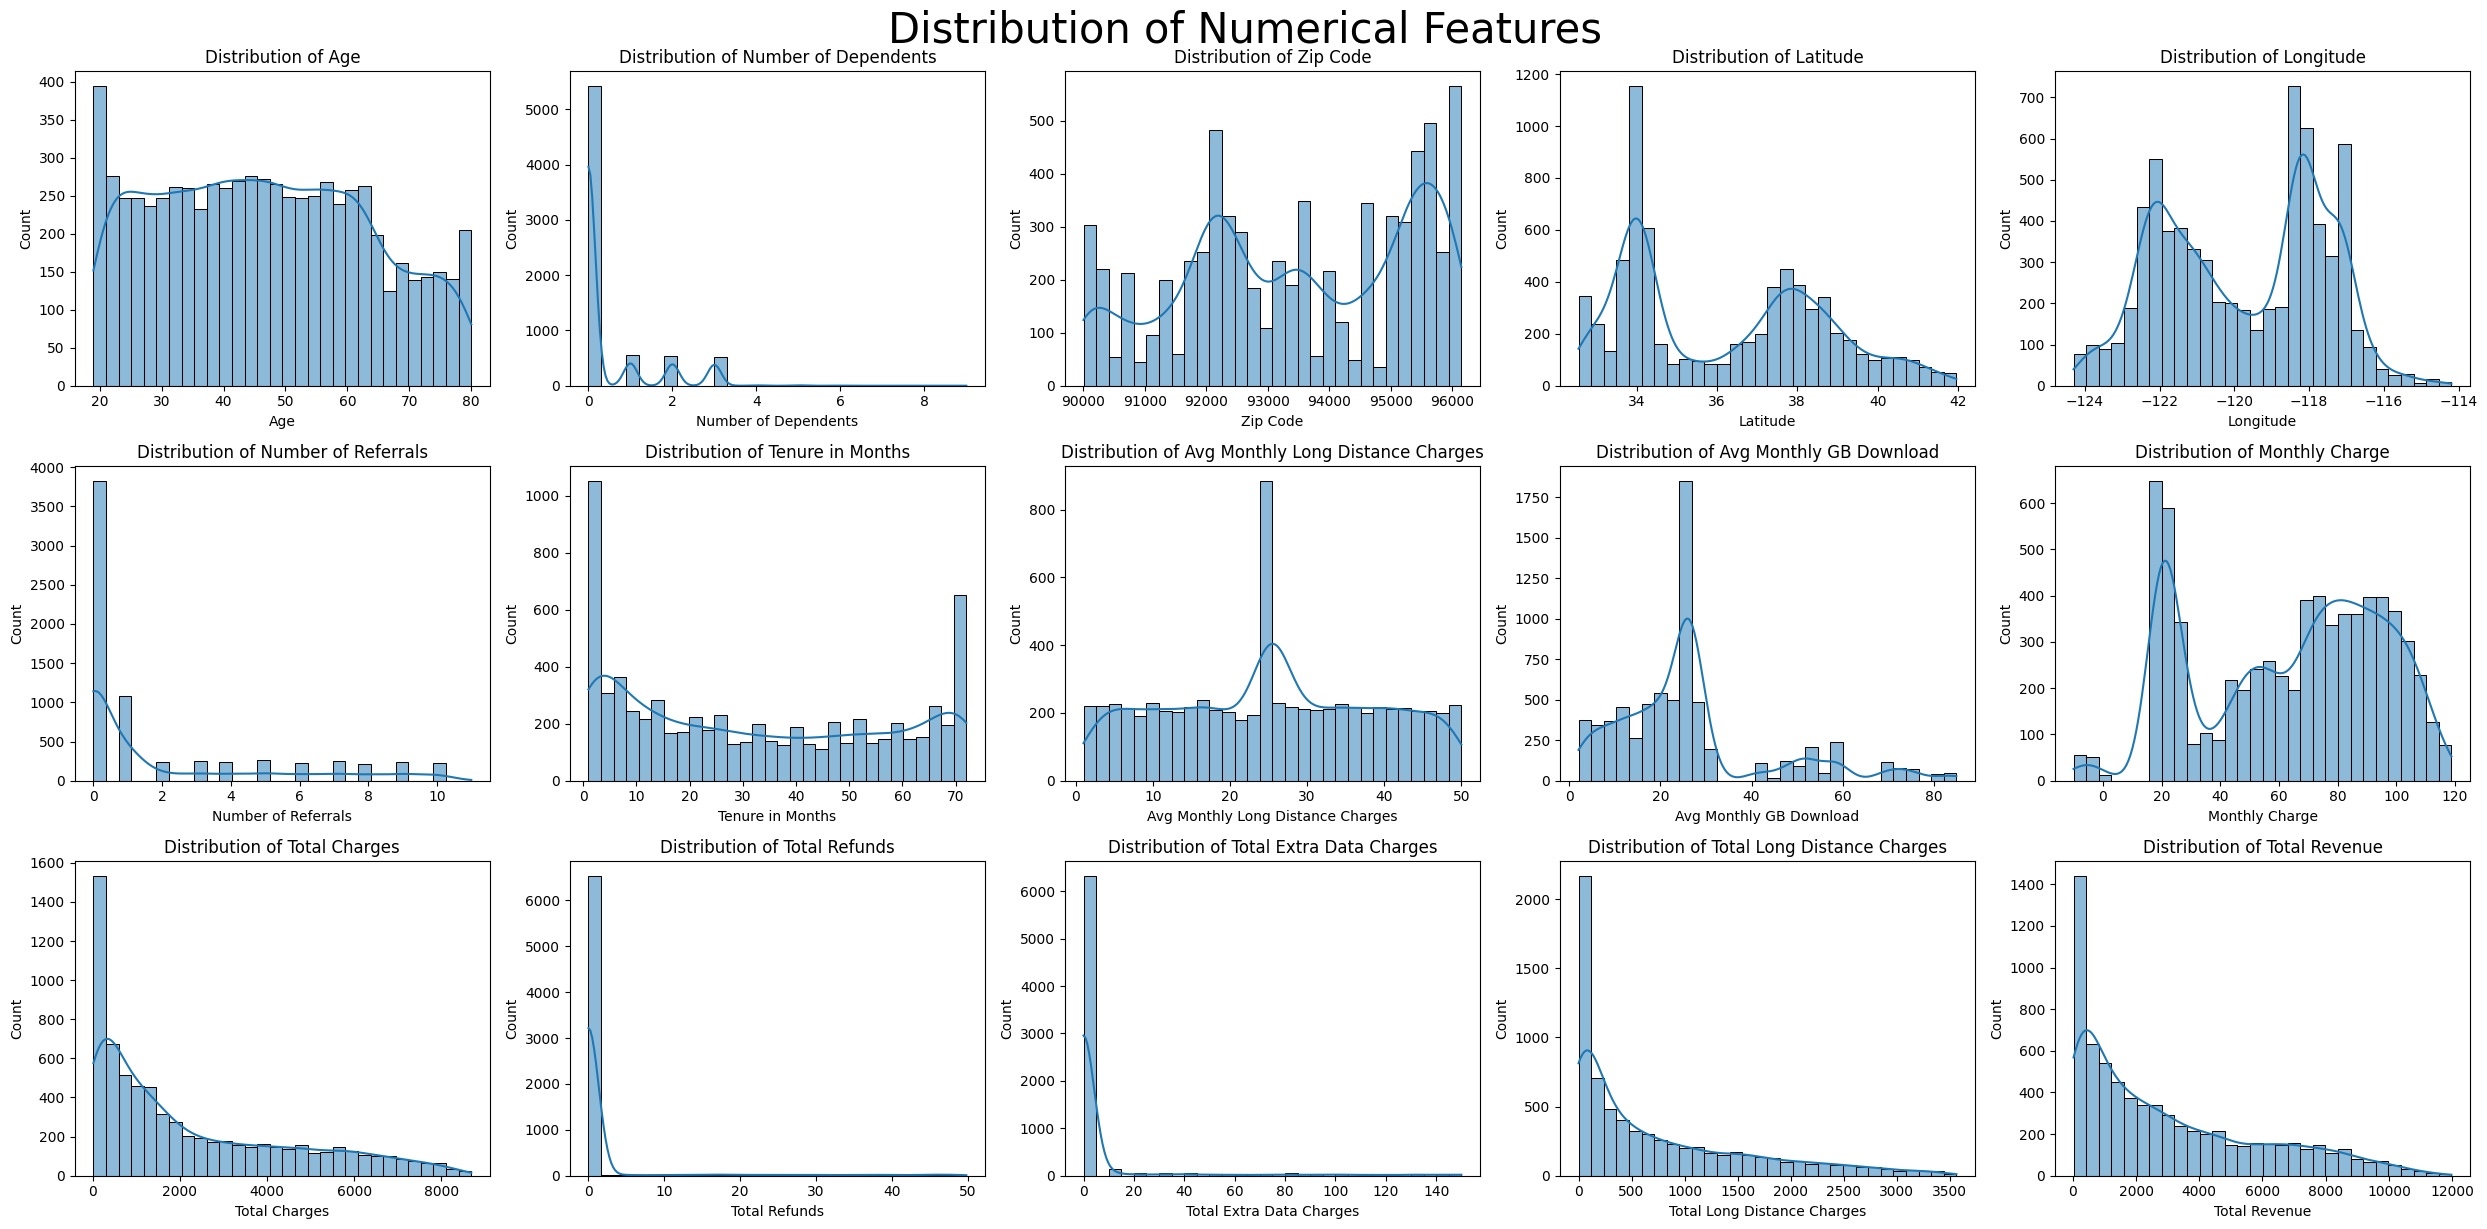

In [ ]:
# Determine how many measurement-based fields are present in the dataset for analysis or visualization purposes, excluding the outcome variable.
numerical_colss = datafile_churn.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')
n = len(numerical_colss)

# Explain horizontal grouping and figure out how many complete groups are required.
cols = 5
rows = int(nmpy.ceil(n / cols))

# Depending on the total number of charts to be shown, create a systematic layout with several sections to arrange the graphical outputs in a neat and consistent way.
fig, axes = mplt.subplots(rows, cols, figsize=(5*cols, 4*rows))
# To make handling the structure easier, turn it into a flat list.
axes = axes.flatten()

# Create a frequency graph for each continuous variable one at a time, highlighting patterns in the values with curves, and displaying the results in the designated sections.
for i, col in enumerate(numerical_colss):
    sbn.histplot(datafile_churn[col], bins=30, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(f"Distribution of {col}")

# To make the layout look neat and concentrated solely on the elements that are visible, tidy up any leftover unused portions of the visual structure.
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Modify the general spacing to avoid layout collisions.
mplt.tight_layout()
# To give context for the collection of feature distributions shown, place a clear overall heading at the top of the entire figure.
mplt.suptitle("Distribution of Numerical Features", fontsize=30, y=1.02)
# Display the final visual result.
mplt.show()

Count Plots

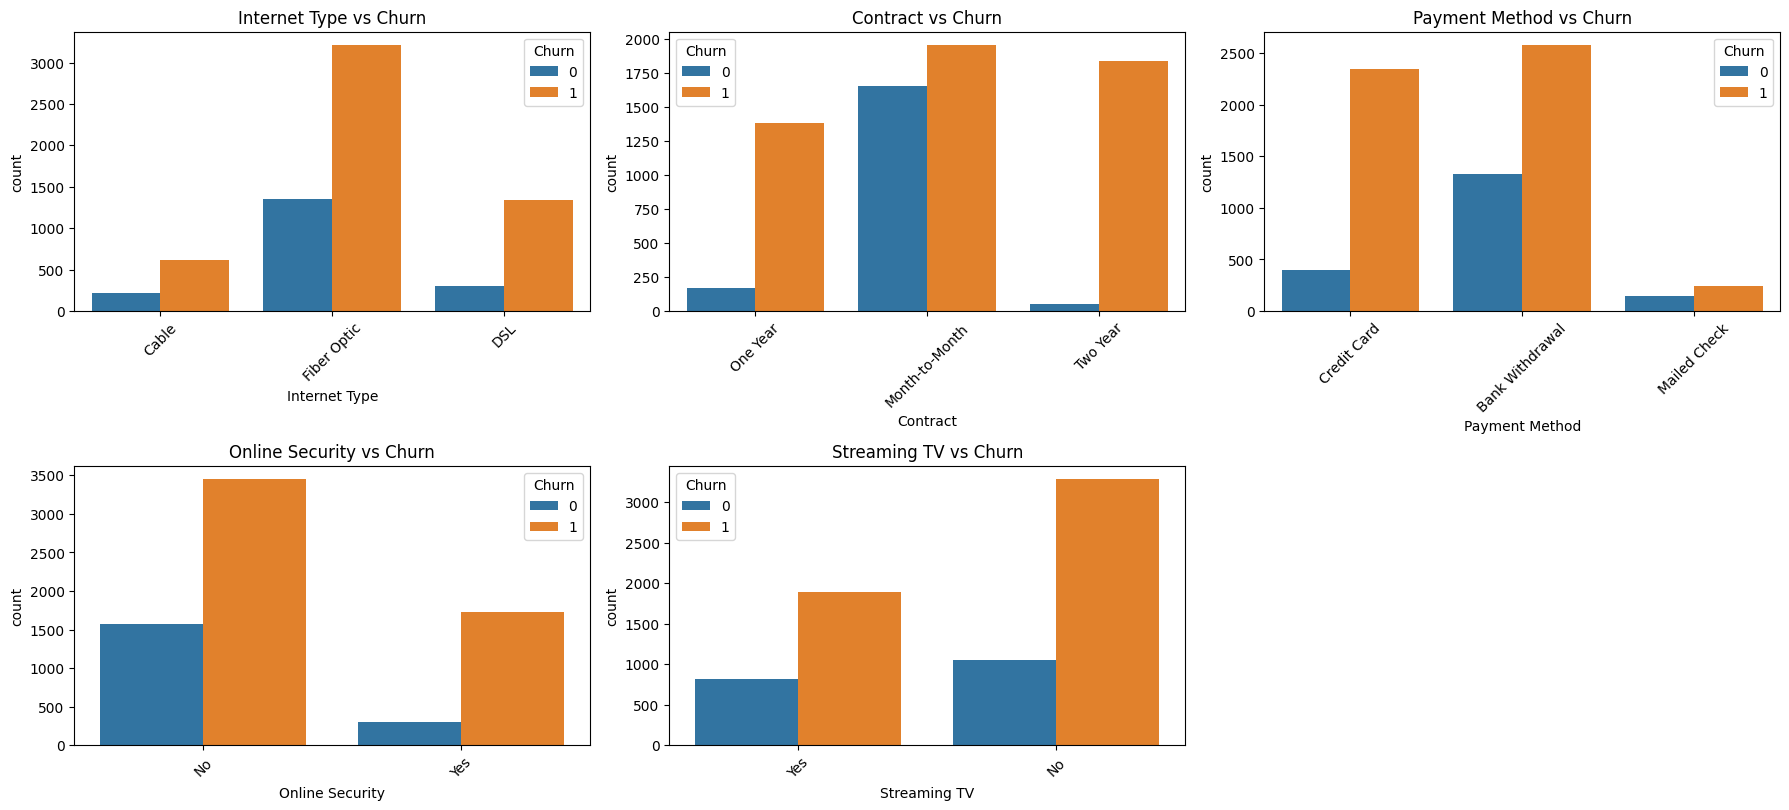

In [ ]:
# Pick a few crucial fields that receive a lot of answers.
top_cat_features = ['Internet Type', 'Contract', 'Payment Method', 'Online Security', 'Streaming TV']

# Indicate the number of vertical and horizontal panels that the whole visualization will require.
n_rows, n_cols = 3, 3
# Make a canvas with several areas on which separate feature plots will be shown.
fig, axes = mplt.subplots(n_rows, n_cols, figsize=(18, 12))
# Flatten the grid to facilitate looping through it.
axes = axes.flatten()

# Examine each field you have chosen one at a time.
for i, col in enumerate(top_cat_features):
    # Group categories together to create a picture that compares how they relate to the result.
    sbn.countplot(x=col, hue='Churn', data=datafile_churn, ax=axes[i])
    # To make it clear which attribute is being examined, place a descriptive caption above each comparison panel.
    axes[i].set_title(f"{col} vs Churn")
    # When there is little room, reorient the category titles behind the graphical bars to make them more readable.
    axes[i].tick_params(axis='x', rotation=45)

# To keep the presentation layout neat and targeted, remove any unnecessary portions of the display grid.
for j in range(len(top_cat_features), n_rows * n_cols):
    fig.delaxes(axes[j])
# Verify that the figure fits together properly.
mplt.tight_layout()
# Display the completed result with every chart.
mplt.show()


Violin Plot

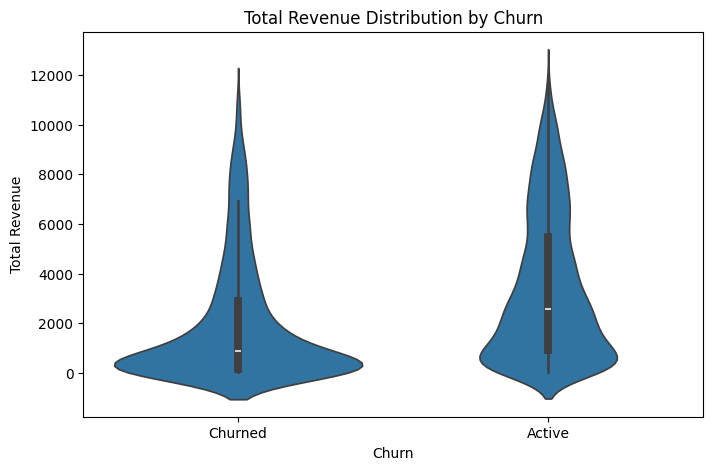

In [ ]:
# Specify the visual output's overall size to guarantee sufficient room for all elements and enhance readability.
mplt.figure(figsize=(8, 5))
# Make a violin-shaped density chart that compares the totals of two categories
sbn.violinplot(x='Churn', y='Total Revenue', data=datafile_churn)
# Include a heading explaining what the chart displays
mplt.title("Total Revenue Distribution by Churn")
# Substitute more understandable group names for the numeric category markers
mplt.xticks([0, 1], ['Churned', 'Active'])
# Show the completed visualization
mplt.show()

Pair Plots

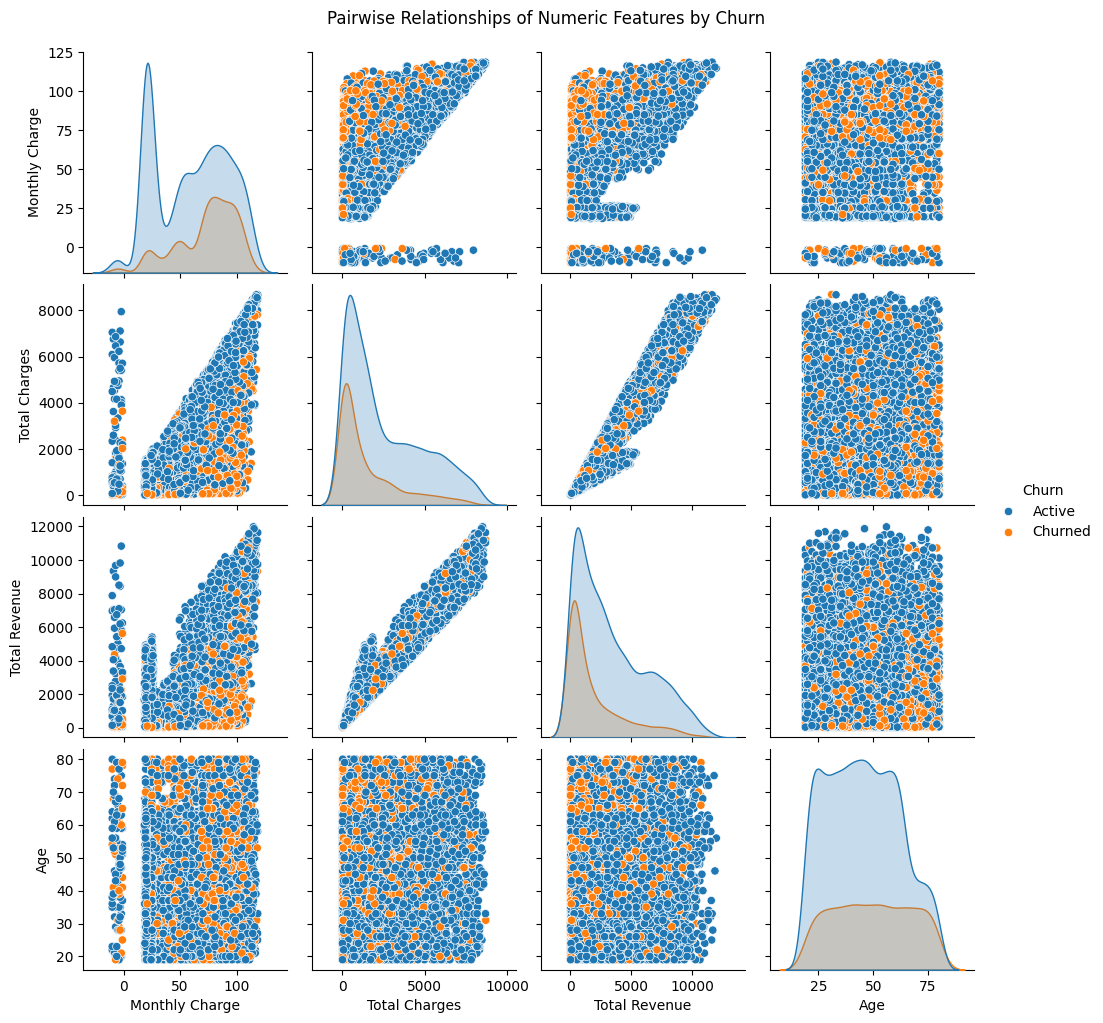

In [ ]:
# Make a temporary copy with specific attributes for graphical examination
df_pair = datafile_churn[['Monthly Charge', 'Total Charges', 'Total Revenue', 'Age', 'Churn']].copy()
# Modify category values to descriptive names for visual differentiation
df_pair['Churn'] = df_pair['Churn'].map({0: 'Churned', 1: 'Active'})

# Use color separation to create a grid of scatter and distribution charts
sbn.pairplot(df_pair, hue='Churn')
# Include a main heading just above the panel layout as a whole
mplt.suptitle("Pairwise Relationships of Numeric Features by Churn", y=1.02)
# Show the outcome on the screen
mplt.show()



Scatter Plot

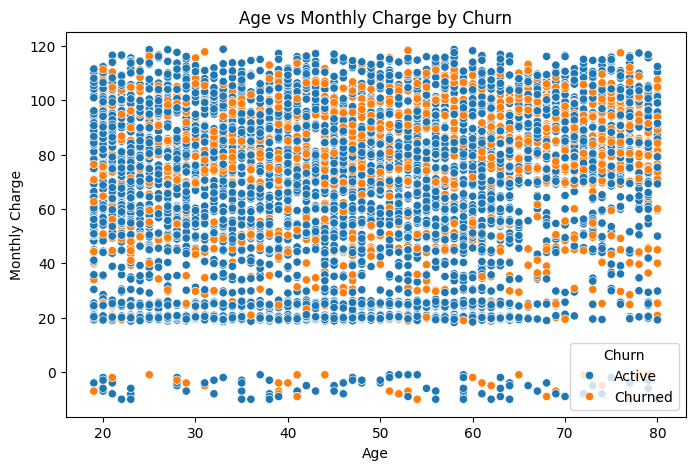

In [ ]:
# Define the dimensions for the whole visual output region.
mplt.figure(figsize=(8, 5))
# Make a colored point plot to investigate how values are distributed among two variables.
sbn.scatterplot(
    data=datafile_churn,
    x='Age',
    y='Monthly Charge',
    # Depending on the type of group, assign different hues.
    hue=datafile_churn['Churn'].map({0: 'Churned', 1: 'Active'})
)
# Create a captivating headline for the image.
mplt.title("Age vs Monthly Charge by Churn")
# Show the whole chart on the user interface.
mplt.show()


Variable define in x and y

In [ ]:
# List every attribute that stores data in a format other than numbers, typically using named categories or labels.
cat_colss = datafile_churn.select_dtypes(include='object').columns
# Create a tool to convert text entries to numeric form
le = LabelEncoder()
# For machine learning compatibility, turn each attribute that has named categories into a numerical representation.
for col in cat_colss:
    datafile_churn[col] = le.fit_transform(datafile_churn[col])
# To separate input characteristics for modeling, remove the outcome indication from the primary dataset.
X = datafile_churn.drop('Churn', axis=1)
# During training, extract the output values that the model will learn to predict.
y = datafile_churn['Churn']

SMOTE for data balancing



Original dataset distribution:
Churn
1    5174
0    1869
Name: count, dtype: int64

Resampled dataset shape: (10348, 34) (10348,)
Original dataset shape: (7043, 34) (7043,)
Resampled dataset distribution:
Churn
1    5174
0    5174
Name: count, dtype: int64


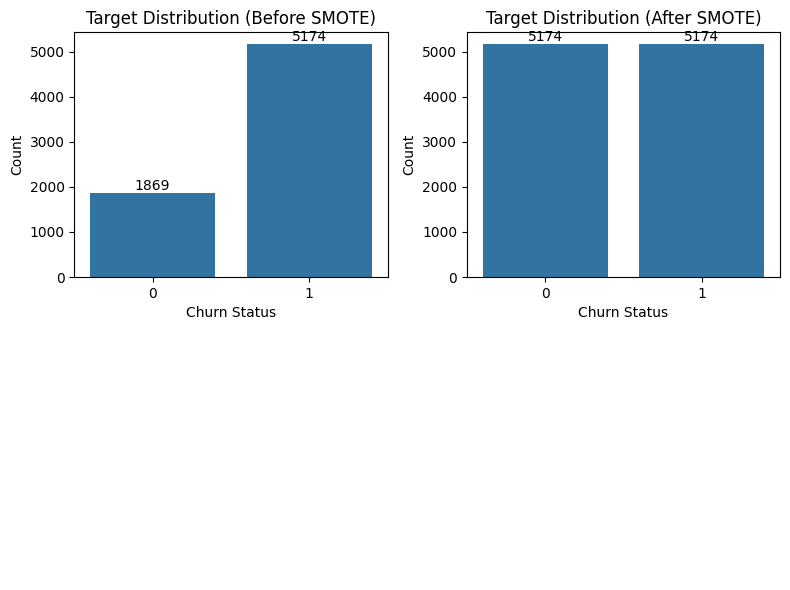

In [ ]:
# Create a grid for several images that are grouped in squares.
fig, axes = mplt.subplots(2, 2, figsize=(8, 6))

# Before using balancing procedures, show the amount of samples for each class label to identify imbalance.
sbn.countplot(x=y, ax=axes[0, 0])
# Before using synthetic balancing, include a heading that describes the class occurrence rates.
axes[0, 0].set_title('Target Distribution (Before SMOTE)')
# Label the horizontal description.
axes[0, 0].set_xlabel('Churn Status')
# Give the left axis a meaningful title that explains what the values mean.
axes[0, 0].set_ylabel('Count')
# To facilitate the interpretation of frequencies, directly overlay numerical values on the chart bars.
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container)

# Provide the current class balance prior to improvement.
print("Original dataset distribution:")
# Output how many items each classification group contains.
print(y.value_counts())

# Create more data for underrepresented outcomes by using an artificial enhancement technique.
smote = SMOTE(random_state=42)
# Use the improvement technique to rebuild the dataset such that all classes are fairly represented.
Churn_X_resampled, Churn_y_resampled = smote.fit_resample(X, y)

# Show the size of the enhanced dataset, indicating the number of samples that are now available.
print("\nResampled dataset shape:", Churn_X_resampled.shape, Churn_y_resampled.shape)

# To ensure that the balancing phase was successful, visualize the category proportions once more.
sbn.countplot(x=Churn_y_resampled, ax=axes[0, 1])
# After improvements, label the visualization to show the outcome distribution's current status.
axes[0, 1].set_title('Target Distribution (After SMOTE)')
# Place an illustrative label beneath the horizontal indication.
axes[0, 1].set_xlabel('Churn Status')
# To make clear what the bars represent, include illustrative language next to the left-side indicator.
axes[0, 1].set_ylabel('Count')
# To provide accurate counts, place numerical values exactly above the updated bars.
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container)
# To provide a baseline for comparison, output the dataset's size prior to any improvements.
print("Original dataset shape:", X.shape, y.shape)
# Show the label frequency that has been balanced.
print("Resampled dataset distribution:")
# After balancing to ensure equal representation, reveal the number of cases that fall into each category.
print(Churn_y_resampled.value_counts())

# Cover the bottom-left visual grid point that isn't being used.
axes[1, 0].axis('off')
# In the visual grid, conceal the bottom-right unused position.
axes[1, 1].axis('off')

# Reorganize components to prevent overlap and create space for titles.
mplt.tight_layout()
# Show everything inside the window.
mplt.show()

Split the dataset

In [ ]:
# To make model training and evaluation easier, divide the enhanced feature set and result labels into discrete subsets.
Churn_X_train, Churn_X_test, Churn_y_train, Churn_y_test = train_test_split(Churn_X_resampled, Churn_y_resampled, test_size=0.2, random_state=42)

# XG Boost

In [ ]:
# Create and implement a sophisticated ensemble approach to find intricate relationships in the data that has been prepared.
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(Churn_X_train, Churn_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Training

In [ ]:
# Using the supplied input segment, create outcome labels from the fitted structure.
Churn_y_train_pred = model.predict(Churn_X_train)
# Get each class's confidence estimates, then separate the desired values.
Churn_y_train_pred_proba = model.predict_proba(Churn_X_train)[:, 1]
# Calculate the percentage of results that accurately reflect actual circumstances.
train_accuracy = accuracy_score(Churn_y_train, Churn_y_train_pred)
# Determine the frequency of accurate positive identifications.
train_precision = precision_score(Churn_y_train, Churn_y_train_pred)
# Evaluate the extent to which real positives are recovered.
train_recall = recall_score(Churn_y_train, Churn_y_train_pred)
# Determine a weighted mean that strikes a balance between completeness and accurate identifications.
train_f1 = f1_score(Churn_y_train, Churn_y_train_pred)
# Create an organized summary by combining several evaluation criteria.
train_classification_report = classification_report(Churn_y_train, Churn_y_train_pred)

# Show the proportion of accurate results the learning system anticipated when tested using replies that were already known.
print(f"Training Accuracy: {train_accuracy:.4f}")
# Provide the percentage of cases found by the system that truly match genuine positive examples.
print(f"Training Precision: {train_precision:.4f}")
# Indicate the number of real instances of the target that were effectively recorded during the assessment.
print(f"Training Recall: {train_recall:.4f}")
# Display the statistical combination that considers both coverage thoroughness and detection accuracy.
print(f"Training F1 Score: {train_f1:.4f}")
# Provide a thorough analysis that examines prediction quality using a variety of measurement metrics.
print("\nTraining Classification Report:")
print(train_classification_report)

Training Accuracy: 0.9935
Training Precision: 0.9947
Training Recall: 0.9923
Training F1 Score: 0.9935

Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4131
           1       0.99      0.99      0.99      4147

    accuracy                           0.99      8278
   macro avg       0.99      0.99      0.99      8278
weighted avg       0.99      0.99      0.99      8278



Confusion Matrix for training set

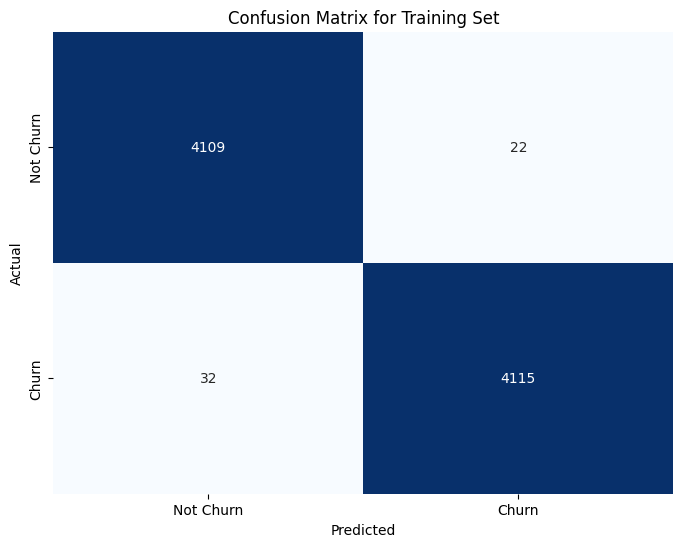

In [ ]:
# Using known responses, create a matrix that shows the right and wrong classification results for every class.
cm_training = confusion_matrix(Churn_y_train, Churn_y_train_pred)

# Specify the actual location where the visual outcome will be displayed.
mplt.figure(figsize=(8, 6))
# Create a visual representation based on squares that shows the number of classification matches and mismatches based on color intensity.
sbn.heatmap(cm_training, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
# Include a broad description to put the visual report in context.
mplt.title('Confusion Matrix for Training Set')
# Indicate on the axis that the outputs of the model are represented by the horizontal scale.
mplt.xlabel('Predicted')
# Indicate which side axis represents the actual grouping.
mplt.ylabel('Actual')
# Make sure the interface displays the finished figure.
mplt.show()

ROC Curve for training set

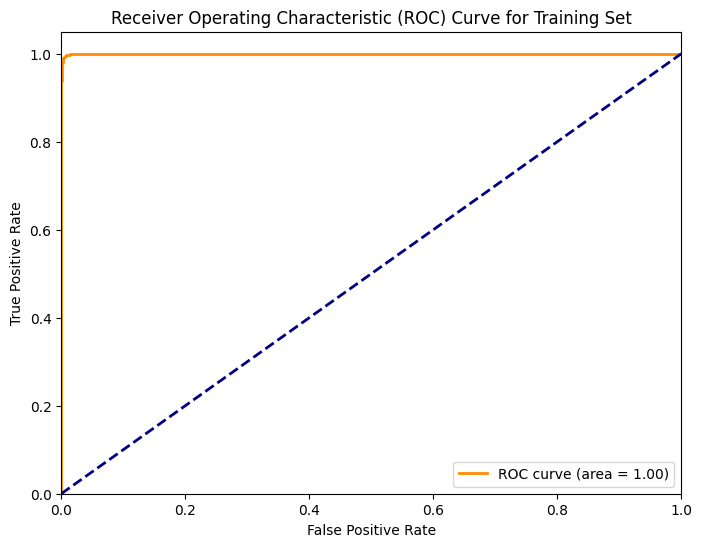

In [ ]:
# Create the elements required to create a curve that illustrates the connection between the incorrect alarm rate and detection sensitivity.
fpr_training, tpr_train, thresholds_train = roc_curve(Churn_y_train, Churn_y_train_pred_proba)
# To measure the method's capacity to differentiate between categories across all decision boundaries, compute the area beneath the curve.
roc_auc_train = auc(fpr_training, tpr_train)

# Construct the chart's canvas dimensions.
mplt.figure(figsize=(8, 6))
# Use a shaded indicator of overall effectiveness to plot the line that graphically illustrates the model's trade-off between sensitivity and false alarms.
mplt.plot(fpr_training, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
# Include a reference line that shows random behavior so that it can be compared to other examples.
mplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Define the visible range of false positives by setting the horizontal axis limits.
mplt.xlim([0.0, 1.0])
# To completely display the height fluctuation of the curve, set the vertical axis's limitations.
mplt.ylim([0.0, 1.05])
# Indicate the percentage of false alarms compared to negatives by labeling the lower axis.
mplt.xlabel('False Positive Rate')
# Indicate the percentage of true positives that were correctly flagged by labeling the side axis.
mplt.ylabel('True Positive Rate')
# Give the diagram a title that accurately conveys its function in the depiction of model performance.
mplt.title('Receiver Operating Characteristic (ROC) Curve for Training Set')
# To make the meaning of the colored curve more clear, provide an explanation key in the lower right corner.
mplt.legend(loc="lower right")
# Render and show the viewer the entire graphical output.
mplt.show()

Testing

In [ ]:
# Estimate results on unknown examples using the standard methodology.
y_pred = model.predict(Churn_X_test)
# Produce likelihood values that show the degree to which each incident corresponds to a certain outcome.
y_pred_proba = model.predict_proba(Churn_X_test)[:, 1]

# Calculate the frequency with which the answers match the overall expectations.
accuracy = accuracy_score(Churn_y_test, y_pred)
# Assess the frequency with which the favorable results are appropriate and significant.
precision = precision_score(Churn_y_test, y_pred)
# Evaluate how well real positives were recorded.
recall = recall_score(Churn_y_test, y_pred)
# Offer a thorough performance metric that captures accuracy and comprehensiveness.
f1 = f1_score(Churn_y_test, y_pred)
# Create a comparison matrix to show how the true and forecasted values agree and disagree visually.
conf_matrix = confusion_matrix(Churn_y_test, y_pred)

# Show the percentage of overall results that met expectations, providing a broad indication of accuracy.
print(f"Accuracy: {accuracy:.4f}")
# Show how accurately the algorithm identified pertinent examples from those it labeled, emphasizing accuracy above quantity.
print(f"Precision: {precision:.4f}")
# Highlight completeness by demonstrating the system's capacity to identify genuine, pertinent instances from all possible outcomes.
print(f"Recall: {recall:.4f}")
# Provide a total score that reflects the overall consistency of performance by striking a balance between correctness and completeness.
print(f"F1 Score: {f1:.4f}")

# Provide a thorough analysis of performance per category.
print("\nClassification Report:")

# Provide a thorough analysis of performance across all categories, highlighting the precision, recall, and overall efficacy of detection quality.
print(classification_report(Churn_y_test, y_pred))

Accuracy: 0.8879
Precision: 0.8818
Recall: 0.8939
F1 Score: 0.8878

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1043
           1       0.88      0.89      0.89      1027

    accuracy                           0.89      2070
   macro avg       0.89      0.89      0.89      2070
weighted avg       0.89      0.89      0.89      2070



Confusion Matrix for testing set

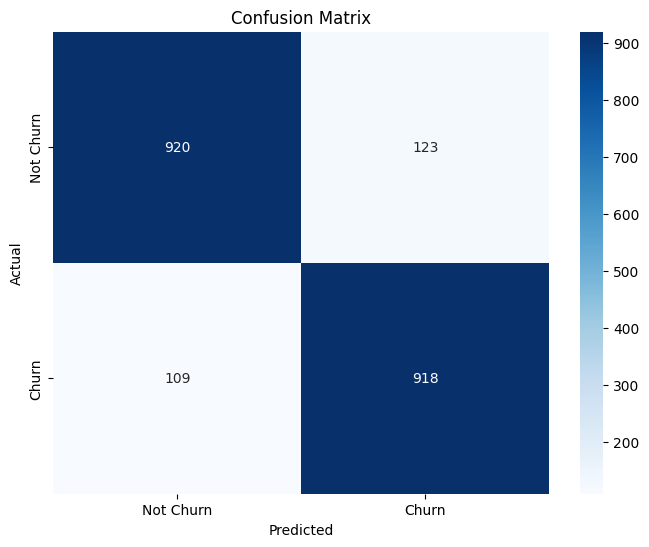

In [ ]:
# Define the visual output's canvas dimensions.
mplt.figure(figsize=(8, 6))
# Shows a graphic depiction of the frequency of each kind of prediction result, with labels to make the categories being compared clear and color shading to show magnitude.
sbn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
# To show the anticipated group, label the lower horizontal axis.
mplt.xlabel('Predicted')
# Helps the observer discern between what actually happened and what was expected by labeling the vertical axis to clearly highlight the dataset's true categories.
mplt.ylabel('Actual')
# Provides a clear header above the visual output to explain the image's purpose and help visitors comprehend what the diagram is showing.
mplt.title('Confusion Matrix')
# Project the finished image onto the screen.
mplt.show()

ROC Curve for testing set

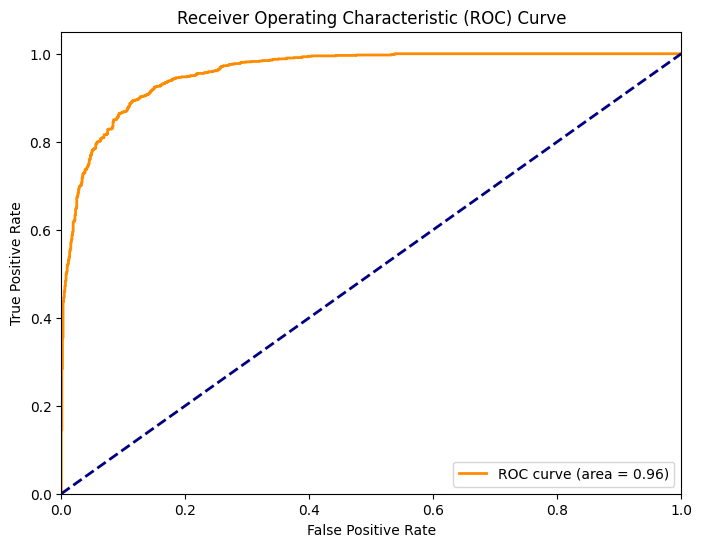

In [ ]:
# Obtains the information required to demonstrate the connection between inaccurately predicted positive outcomes and accurately detected positive cases across various decision limits.
fpr, tpr, thresholds = roc_curve(Churn_y_test, y_pred_proba)
# Using the data from the diagnostic curve, it calculates a single value that sums up the model's ability to differentiate across categories.
roc_auc = auc(fpr, tpr)

# Configure the chart's display window's dimensions.
mplt.figure(figsize=(8, 6))
# Incorporates the effectiveness score for context and draws a graphic line connecting performance points to show how the model's capacity to distinguish between outcomes varies with varying thresholds.
mplt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# In order to provide a point of comparison for model evaluation, a diagonal marker is added to indicate a baseline at which the system has no predictive capacity.
mplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Adjusts the horizontal axis's scale to make sure the entire spectrum of possible false positive rates is evenly distributed and visible.
mplt.xlim([0.0, 1.0])
# Define the values for the vertical boundaries.
mplt.ylim([0.0, 1.05])
# Labels the bottom axis to indicate that it shows the percentage of false positive predictions out of all real negative situations.
mplt.xlabel('False Positive Rate')
# Inserts a label on the side axis to show that it represents the percentage of accurately identified positive cases out of all positive cases.
mplt.ylabel('True Positive Rate')
# Indicates that the visual depicts the trade-off between accurate detection and false alarms across thresholds by clearly placing a title above the plot.
mplt.title('Receiver Operating Characteristic (ROC) Curve')
# In a corner that doesn't block crucial portions of the visualization, it shows an instructive box that identifies plotted lines and their significance.
mplt.legend(loc="lower right")
# Show the finished chart.
mplt.show()

# Cat Boost

In [ ]:
# Builds a highly effective predictive system with settings that regulate its speed, learning depth, resistance to overfitting, and responsiveness to assessment findings during training, especially for data with non-numeric categories.
catboost_model = CatBoostClassifier(iterations=500,
                                    learning_rate=0.1,
                                    depth=6,
                                    l2_leaf_reg=3,
                                    loss_function='Logloss',
                                    eval_metric='Accuracy',
                                    random_seed=42,
                                    verbose=100,
                                    early_stopping_rounds=50
                                    )

# Gives the system instructions to learn from the specified training portion of the dataset, continuously tracks development with a separate evaluation portion, and makes sure the best model version is kept based on performance observations.
catboost_model.fit(Churn_X_train, Churn_y_train,
                   eval_set=(Churn_X_test, Churn_y_test),
                   use_best_model=True) # Uses the model version that performed the best during the learning process, guaranteeing that the best outcomes are applied to assessments or forecasts in the future.

0:	learn: 0.8255617	test: 0.8169082	best: 0.8169082 (0)	total: 55.1ms	remaining: 27.5s
100:	learn: 0.9161633	test: 0.8816425	best: 0.8816425 (100)	total: 744ms	remaining: 2.94s
200:	learn: 0.9508335	test: 0.8903382	best: 0.8908213 (192)	total: 1.44s	remaining: 2.14s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8922705314
bestIteration = 227

Shrink model to first 228 iterations.


Training

In [ ]:
# Using the knowledge gained during the learning phase, it creates predicted category labels for the training data, enabling evaluation of the model's comprehension of the patterns.
Churn_y_train_pred_catboost = catboost_model.predict(Churn_X_train)
# Provides a confidence estimate for every prediction instead of merely a hard classification by extracting the likelihood that the model assigns to the positive class.
Churn_y_train_pred_proba_catboost = catboost_model.predict_proba(Churn_X_train)[:, 1]

# Provides an overall sense of correctness by calculating the frequency with which the model's predictions for the training data match the true labels.
train_accuracy_catboost = accuracy_score(Churn_y_train, Churn_y_train_pred_catboost)
# Assesses the percentage of expected good outcomes that came to pass, demonstrating the model's dependability in making accurate predictions.
train_precision_catboost = precision_score(Churn_y_train, Churn_y_train_pred_catboost)
# Highlights the model's capacity to catch true positives by calculating the percentage of real positive cases that it was able to identify.
train_recall_catboost = recall_score(Churn_y_train, Churn_y_train_pred_catboost)
# Generates a single performance score that strikes a balance between the trade-off between completeness in detecting positives and accuracy in forecasting them.
train_f1_catboost = f1_score(Churn_y_train, Churn_y_train_pred_catboost)
# Provides a thorough analysis of the model's performance in every category, highlighting the most important performance metrics for every class.
train_classification_report_catboost = classification_report(Churn_y_train, Churn_y_train_pred_catboost)

# Helps evaluate the model's overall dependability on known data by providing the percentage of accurate predictions it made throughout the learning phase.
print(f"CatBoost Training Accuracy: {train_accuracy_catboost:.4f}")
# Shows the model's accuracy in decision-making by demonstrating how effectively it was able to concentrate on and accurately forecast the most pertinent outcomes.
print(f"CatBoost Training Precision: {train_precision_catboost:.4f}")
# Shows the model's efficacy in capturing positive examples by demonstrating how well it was able to detect every incident that fell into the favorable category.
print(f"CatBoost Training Recall: {train_recall_catboost:.4f}")
# Provides a more nuanced success indicator by reporting a composite score that strikes a balance between the model's positive predictions' completeness and accuracy.
print(f"CatBoost Training F1 Score: {train_f1_catboost:.4f}")
# Provides a thorough overview of the model's performance for every classification group, along with important evaluation metrics that highlight its advantages and disadvantages.
print("\nCatBoost Training Classification Report:")
print(train_classification_report_catboost)

CatBoost Training Accuracy: 0.9589
CatBoost Training Precision: 0.9692
CatBoost Training Recall: 0.9482
CatBoost Training F1 Score: 0.9586

CatBoost Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4131
           1       0.97      0.95      0.96      4147

    accuracy                           0.96      8278
   macro avg       0.96      0.96      0.96      8278
weighted avg       0.96      0.96      0.96      8278



Confusion matrix for training set

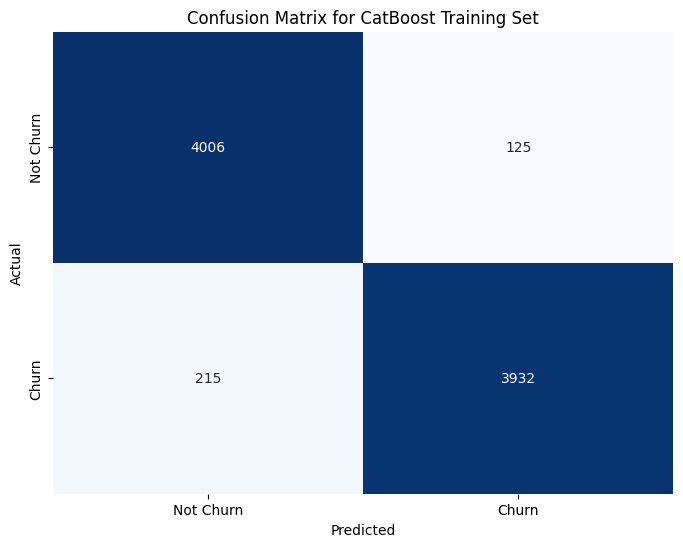

In [ ]:
# Creates a table that contrasts the projected labels from the learning data with the actual labels, providing a thorough overview of the model's accurate and inaccurate classifications.
cm_training_catboost = confusion_matrix(Churn_y_train, Churn_y_train_pred_catboost)

# Set the canvas's dimensions for the final product.
mplt.figure(figsize=(8, 6))
# Helps rapidly assess model accuracy and error patterns by displaying a visual chart with color intensity and numerical labels representing the count of each classification outcome.
sbn.heatmap(cm_training_catboost, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
# To make it clear that the chart displays the prediction outcomes from the model's training phase, a descriptive title is added above it.
mplt.title('Confusion Matrix for CatBoost Training Set')
# Helps viewers differentiate between expected and actual results by labeling the horizontal axis to show that it matches to the model's forecasted categories.
mplt.xlabel('Predicted')
# Provides a description at the chart's side to help compare the data points to the anticipated assignments by elucidating which categories actually correspond to each data point.
mplt.ylabel('Actual')
# Present the final image on the screen.
mplt.show()

ROC Curve for training set

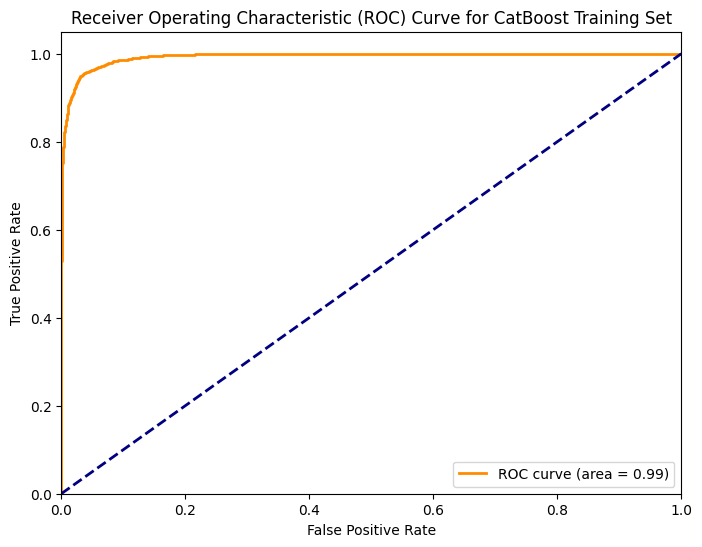

In [ ]:
# Determines the required values to track the correlation between false positives and correctly identified alerts at different decision boundaries for the learning component.
fpr_training_catboost, tpr_train_catboost, thresholds_train_catboost = roc_curve(Churn_y_train, Churn_y_train_pred_proba_catboost)
# Determines a single metric, based on the entire range of decision criteria, that sums up how well the system can distinguish between categories.
roc_auc_train_catboost = auc(fpr_training_catboost, tpr_train_catboost)

# Configure the visual plot's canvas size.
mplt.figure(figsize=(8, 6))
# Illustrates how performance changes with different thresholds by drawing a line that shows the model's capacity to accurately identify true cases while reducing false warnings.
mplt.plot(fpr_training_catboost, tpr_train_catboost, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train_catboost)
# Inserts a diagonal line as a baseline for comparison, showing a system that makes just arbitrary guesses and has no true predictive ability.
mplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Ensures that the chart appropriately depicts realistic performance metrics by restricting the horizontal axis to legitimate boundaries for probability scores.
mplt.xlim([0.0, 1.0])
# For complete view, keep the y-axis range just above 1.
mplt.ylim([0.0, 1.05])
# Indicates the frequency of false signals relative to all potential misses.
mplt.xlabel('False Positive Rate')
# Shows the percentage of accurately identified significant events among all actual occurrences.
mplt.ylabel('True Positive Rate')
# Summarizes the visual's message with a brief explanation above the diagram.
mplt.title('Receiver Operating Characteristic (ROC) Curve for CatBoost Training Set')
# Provides a brief explanation of the plotted line's meaning within the diagram's context.
mplt.legend(loc="lower right")
# As the last stage of the display process, it makes the visual content visible.
mplt.show()

Testing

In [ ]:
# Estimates unknown entries' categories based on learnt behavior by applying the finalized learning structure to them.
y_pred_catboost = catboost_model.predict(Churn_X_test)
# Provides information about the system's level of confidence in each estimation by retrieving the probability values linked to the desired outcome.
y_pred_proba_catboost = catboost_model.predict_proba(Churn_X_test)[:, 1]

# Calculates the system's overall response success rate based on information that hasn't been seen.
accuracy_catboost = accuracy_score(Churn_y_test, y_pred_catboost)
# Determines the frequency with which the system accurately detects the intended result when it makes such assertions.
precision_catboost = precision_score(Churn_y_test, y_pred_catboost)
# Assesses the percentage of genuinely pertinent cases that the system was able to identify.
recall_catboost = recall_score(Churn_y_test, y_pred_catboost)
# Consolidates the capacity to accurately recognize and record significant cases into a single representative score.
f1_catboost = f1_score(Churn_y_test, y_pred_catboost)
# Creates a systematic comparison between the predicted and actual results, enabling a more thorough comprehension of the advantages and disadvantages.
conf_matrix_catboost = confusion_matrix(Churn_y_test, y_pred_catboost)

# Shows the percentage of accurate results the system produced when tested on unknown records.
print(f"CatBoost Accuracy: {accuracy_catboost:.4f}")
# Shows how consistently the system identifies important cases while excluding those that aren't relevant.
print(f"CatBoost Precision: {precision_catboost:.4f}")
# Demonstrates the system's capacity to record all pertinent events that truly took place.
print(f"CatBoost Recall: {recall_catboost:.4f}")
# Provides a cohesive performance figure that accurately and comprehensively identifies significant events.
print(f"CatBoost F1 Score: {f1_catboost:.4f}")
# Prints an organized table that highlights decision-making mistakes and strengths by contrasting actual and anticipated circumstances.
print("\nCatBoost Confusion Matrix:")
print(conf_matrix_catboost)

# Produces and presents a comprehensive overview that deconstructs the system's efficacy for every group, encompassing several assessment metrics to offer a comprehensive perspective of its behavior.
print("\nCatBoost Classification Report:")
print(classification_report(Churn_y_test, y_pred_catboost))

CatBoost Accuracy: 0.8923
CatBoost Precision: 0.8903
CatBoost Recall: 0.8929
CatBoost F1 Score: 0.8916

CatBoost Confusion Matrix:
[[930 113]
 [110 917]]

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1043
           1       0.89      0.89      0.89      1027

    accuracy                           0.89      2070
   macro avg       0.89      0.89      0.89      2070
weighted avg       0.89      0.89      0.89      2070



Confusion Matrix for testing set

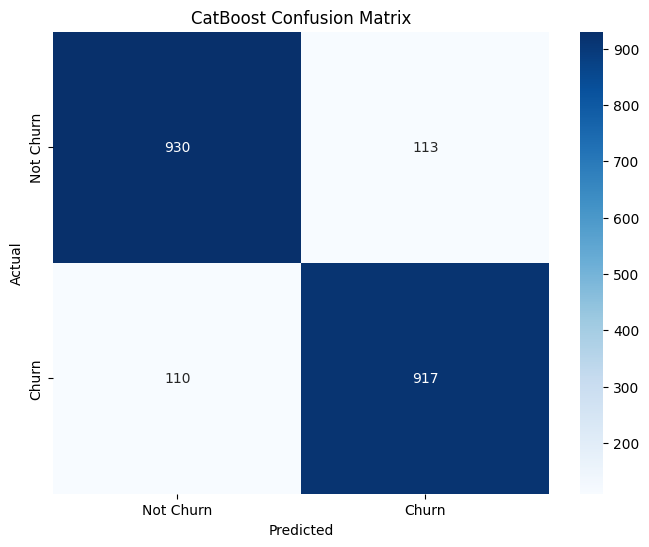

In [ ]:
# Set the canvas's dimensions for the final product.
mplt.figure(figsize=(8, 6))
# Shows a graphic layout with numbers and shaded areas that show the frequency of each kind of outcome, making it easier to spot trends in both right and wrong choices.
sbn.heatmap(conf_matrix_catboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
# Assign the anticipated group to the lower horizontal axis.
mplt.xlabel('Predicted')
# Label the left vertical axis to show which groups are actually there.
mplt.ylabel('Actual')
# At the top of the image, add a header.
mplt.title('CatBoost Confusion Matrix')
# Present the final image on the screen.
mplt.show()

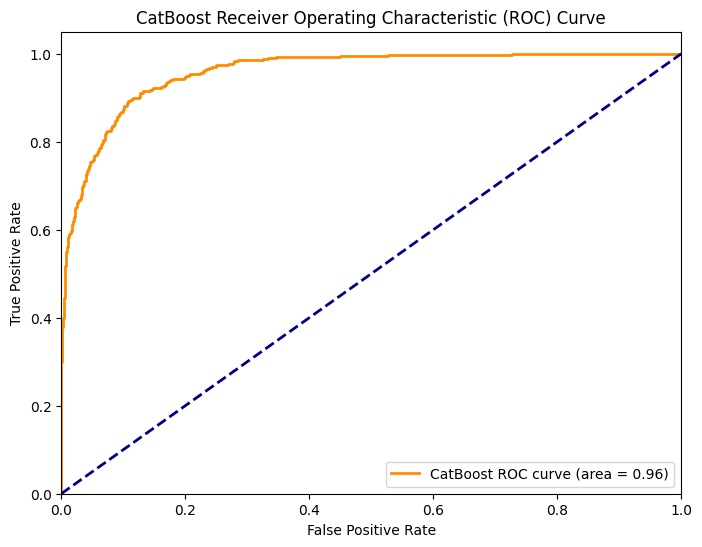

In [ ]:
# Determines the data points required to analyze how the system strikes a balance between accurate warnings and successful detections as the sensitivity setting changes.
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(Churn_y_test, y_pred_proba_catboost)
# Provides a summary of the system's overall ability to divide various categories into a single value depending on the variety of options.
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

# Adjusts the visual frame's size to make sure the text fits and is understandable.
mplt.figure(figsize=(8, 6))
# Plots a line that shows the system's performance in various choice settings, demonstrating how it handles error and detection trade-offs.
mplt.plot(fpr_catboost, tpr_catboost, color='darkorange', lw=2, label=f'CatBoost ROC curve (area = {roc_auc_catboost:.2f})')
# Included is a diagonal guide line that illustrates how a procedure that makes assumptions without using data would behave.
mplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Ensures that all error-related points are shown within a meaningful range by limiting the lower axis to valid values.
mplt.xlim([0.0, 1.0])
# To improve readability and keep the curve from touching the frame, set the vertical scale just over the maximum.
mplt.ylim([0.0, 1.05])
# Indicates how frequently the system falsely identifies normal cases by labeling the bottom axis.
mplt.xlabel('False Positive Rate')
# Indicates the frequency with which the system correctly detects significant circumstances by labeling the side axis.
mplt.ylabel('True Positive Rate')
# Puts a title that explains the type of evaluation the visual is presenting above the graph.
mplt.title('CatBoost Receiver Operating Characteristic (ROC) Curve')
# Incorporates a reference box that provides an explanation of the displayed curve's meaning, including its effectiveness score
mplt.legend(loc="lower right")
# Present the final image on the screen.
mplt.show()

# Gradient Boosting

In [ ]:
# Establishes a process that creates several decision-making phases, each of which aims to fix errors from the one before it; the configuration regulates the number of phases created, their influence, the complexity of the choices, and the consistency of behavior between runs.
gb_model = GradientBoostingClassifier(n_estimators=100,       # Indicates the number of distinct learning phases that will be integrated, each of which progressively enhances the decision-making process as a whole.
                                      learning_rate=0.1,      # Assists in balancing learning speed and stability by determining the degree to which each distinct learning stage shapes the eventual result.
                                      max_depth=3,            # Prevents the system from being unduly customized to the training data by restricting the amount of detail that may be included in each decision-making stage.
                                      random_state=42         # Establishes a constant starting point for any process randomness, ensuring that the same outcomes are generated each time the code is executed.
                                      )
# Uses labeled samples to lead the system through a learning process so it can find relationships and patterns that can be utilized to forecast the future.
gb_model.fit(Churn_X_train, Churn_y_train)

GradientBoostingClassifier(random_state=42)

Training

In [ ]:
# Assigns categories to the known data using the taught decision-making structure, demonstrating how well the system has assimilated patterns throughout its learning phase.
Churn_y_train_pred_gb = gb_model.predict(Churn_X_train)
# Generates a confidence score for each example's likelihood of falling into the relevant category, which is crucial for assessing performance across different decision thresholds.
Churn_y_train_pred_proba_gb = gb_model.predict_proba(Churn_X_train)[:, 1]

# Determines the frequency with which the system accurately assigned outcomes during the learning phase, providing a general indicator of its dependability using known data.
train_accuracy_gb = accuracy_score(Churn_y_train, Churn_y_train_pred_gb)
# Indicates how accurate the system was in identifying particular outcomes of interest and how many of its wise choices were in fact right.
train_precision_gb = precision_score(Churn_y_train, Churn_y_train_pred_gb)
# Assesses the system's performance in detecting genuine instances by determining if it was able to catch all significant examples it was intended to find.
train_recall_gb = recall_score(Churn_y_train, Churn_y_train_pred_gb)
# Integrates recall and precision into a single, balanced score that represents the system's performance in terms of accuracy and completeness.
train_f1_gb = f1_score(Churn_y_train, Churn_y_train_pred_gb)
# Produces a thorough synopsis of the system's performance in each category, along with a number of evaluation measures that aid in identifying the system's advantages and shortcomings.
train_classification_report_gb = classification_report(Churn_y_train, Churn_y_train_pred_gb)

# Shows how accurate the system's predictions are overall when tested using data it has already seen during learning.
print(f"Gradient Boosting Training Accuracy: {train_accuracy_gb:.4f}")
# Illustrates the system's ability to reliably choose cases that it deemed significant.
print(f"Gradient Boosting Training Precision: {train_precision_gb:.4f}")
# Shows how well the system identified every pertinent instance in the training dataset.
print(f"Gradient Boosting Training Recall: {train_recall_gb:.4f}")
# Offers a single performance metric that strikes a balance between the system's capacity to detect target outcomes accurately and thoroughly.
print(f"Gradient Boosting Training F1 Score: {train_f1_gb:.4f}")
# Provides a detailed interpretation of the system's decision quality by printing a multi-metric evaluation that dissects its behavior across all categories.
print("\nGradient Boosting Training Classification Report:")
print(train_classification_report_gb)

Gradient Boosting Training Accuracy: 0.8947
Gradient Boosting Training Precision: 0.9176
Gradient Boosting Training Recall: 0.8676
Gradient Boosting Training F1 Score: 0.8919

Gradient Boosting Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4131
           1       0.92      0.87      0.89      4147

    accuracy                           0.89      8278
   macro avg       0.90      0.89      0.89      8278
weighted avg       0.90      0.89      0.89      8278



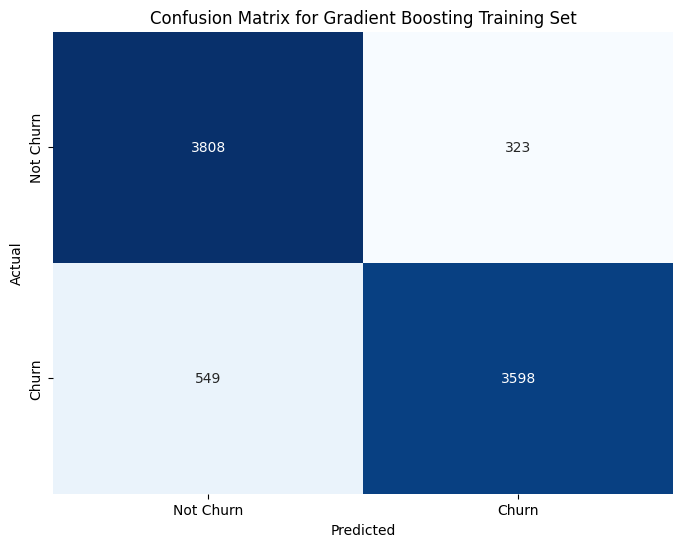

In [ ]:
# Establishes a systematic comparison between the system's training results and expectations, assisting in identifying both accurate and inaccurate results.
cm_training_gb = confusion_matrix(Churn_y_train, Churn_y_train_pred_gb)

# Specifies the dimensions of the visual space to guarantee that every element is distinctly seen and proportionate.
mplt.figure(figsize=(8, 6))
# Makes it simpler to see patterns and mistakes by displaying a color-coded grid with labeled counts that illustrates the system's performance across all classification kinds.
sbn.heatmap(cm_training_gb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
# To make it clear that the chart represents decision outcomes from the learning phase of this particular model, a descriptive heading is added above the visual summary.
mplt.title('Confusion Matrix for Gradient Boosting Training Set')
# The x-axis should be labeled 'Predicted'.
mplt.xlabel('Predicted')
# To facilitate comparison with the model's output, the side axis is labeled to make it clear that it represents the actual categories from the dataset.
mplt.ylabel('Actual')
# Renders the finished visual content so that it can be viewed for interpretation and analysis.
mplt.show()

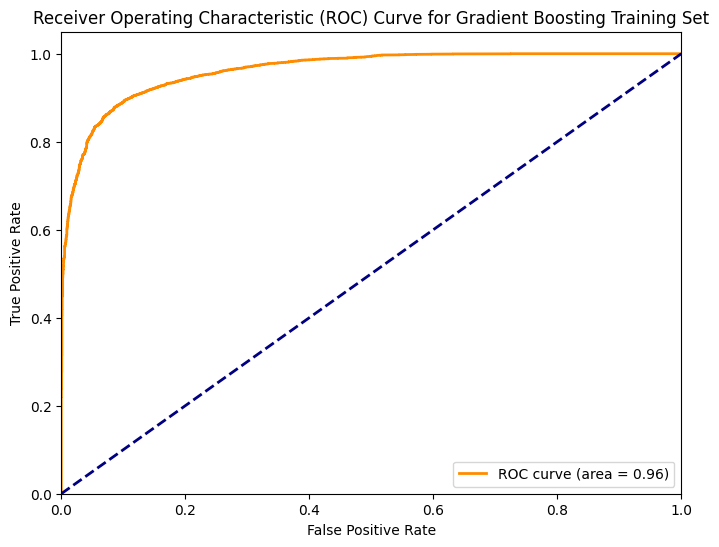

In [ ]:
# Determines the critical numbers required to comprehend how the system strikes a balance between accurate detections and false alarms at various sensitivity settings while learning
fpr_training_gb, tpr_train_gb, thresholds_train_gb = roc_curve(Churn_y_train, Churn_y_train_pred_proba_gb)
# Using the entire range of decision criteria, it calculates a single score that represents how well the system can differentiate between various outcomes.
roc_auc_train_gb = auc(fpr_training_gb, tpr_train_gb)

# Adjusts the diagram's size to guarantee that the visual components are arranged in a readable and clear manner.
mplt.figure(figsize=(8, 6))
# Creates a curve that illustrates how effectively the algorithm distinguishes between various instances at different learning levels of strictness.
mplt.plot(fpr_training_gb, tpr_train_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train_gb)
# Adds a benchmark line as a comparative baseline to show the random chance performance level.
mplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Increases visibility and focus by reducing the range of horizontal values to only include significant data.
mplt.xlim([0.0, 1.0])
# Extends the vertical range slightly to guarantee the entire curve is displayed and prevent overlap at the top border.
mplt.ylim([0.0, 1.05])
# Indicates how frequently the system misidentifies the existence of a target case by marking the lower axis.
mplt.xlabel('False Positive Rate')
# Put the True Positive Rate label on the y-axis.
mplt.ylabel('True Positive Rate')
# Contextualizes the model's evaluation by adding a descriptive title above the graph that explains what the image depicts.
mplt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting Training Set')
# Puts a tiny guide pointing to the plotted line and related performance score in the lower-right corner.
mplt.legend(loc="lower right")
# Shows the finished visual output so that it may be examined and interpreted.
mplt.show()

Testing

In [ ]:
# Assigns outcome categories to previously encountered data using the learned decision process, allowing performance evaluation on novel cases.
y_pred_gb = gb_model.predict(Churn_X_test)
# Obtains the confidence levels linked to the desired result, which are helpful for more in-depth analyses than straightforward classifications.
y_pred_proba_gb = gb_model.predict_proba(Churn_X_test)[:, 1]


# Determines the frequency with which the system's predictions on fresh, unknown data match the actual results, offering a fundamental indicator of dependability.
accuracy_gb = accuracy_score(Churn_y_test, y_pred_gb)
# Indicates how many of the results that the system flagged as significant were actually accurate, demonstrating its reliability and selectivity.
precision_gb = precision_score(Churn_y_test, y_pred_gb)
# Evaluates how well the system found all of the examples in the test data that were actually relevant.
recall_gb = recall_score(Churn_y_test, y_pred_gb)
# Provides a fair assessment of the system's performance in identifying important outcomes by combining correctness and completeness into a single score.
f1_gb = f1_score(Churn_y_test, y_pred_gb)
# Creates a summary table that provides information about the system's blind spots and strengths by highlighting its successes and failures.
conf_matrix_gb = confusion_matrix(Churn_y_test, y_pred_gb)

# Provides an overall impression of the system's efficacy by showing the frequency with which it produced accurate predictions when tested on unknown records.
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
# Demonstrates the system's ability to accurately identify significant cases while excluding a large number of wrong ones.
print(f"Gradient Boosting Precision: {precision_gb:.4f}")
# Demonstrates the system's capacity to record every genuinely significant event found in the test set.
print(f"Gradient Boosting Recall: {recall_gb:.4f}")
# Offers a single score that represents the system's precision and comprehensiveness in determining significant results.
print(f"Gradient Boosting F1 Score: {f1_gb:.4f}")

# Provides a thorough analysis of the system's performance in every category, along with comprehensive evaluation metrics to gauge success from many perspectives.
print("\nGradient Boosting Classification Report:")
print(classification_report(Churn_y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8710
Gradient Boosting Precision: 0.8770
Gradient Boosting Recall: 0.8608
Gradient Boosting F1 Score: 0.8688

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1043
           1       0.88      0.86      0.87      1027

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



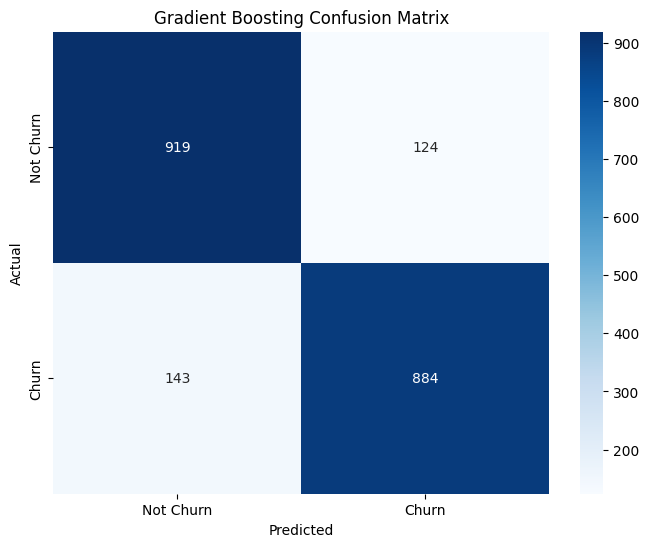

In [ ]:
# To guarantee that every chart element is shown clearly, a new visual canvas with specified proportions is started.
mplt.figure(figsize=(8, 6))
# Creates a colorful grid with numbers representing the number of each category that compares actual results and system decisions.
sbn.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
# Indicates the group the system assigned to each example by labeling the bottom of the grid.
mplt.xlabel('Predicted')
# Indicates which group each example truly belongs to by labeling the grid's side.
mplt.ylabel('Actual')
# Gives the chart a descriptive heading that clarifies the context of the results being shown.
mplt.title('Gradient Boosting Confusion Matrix')
# Renders the finished image so that it can be viewed for interpretation and additional study.
mplt.show()

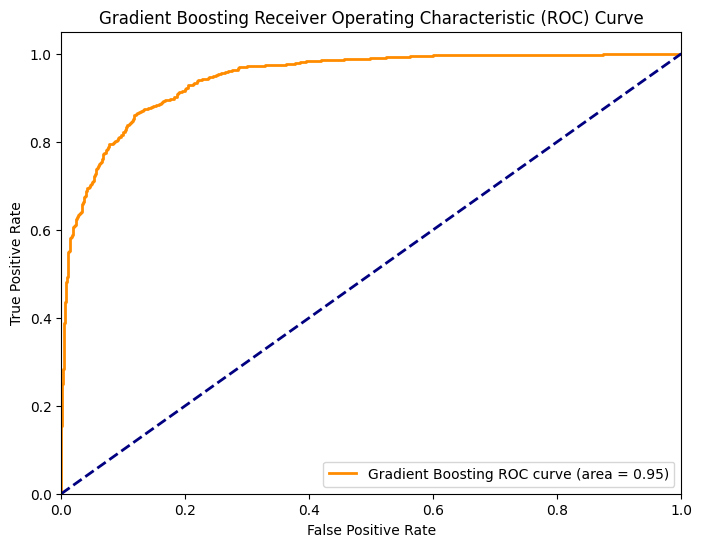

In [ ]:
# Determines the important metrics that show how well the system can differentiate between various outcomes within a variety of choice limits.
fpr_gb, tpr_gb, thresholds_gb = roc_curve(Churn_y_test, y_pred_proba_gb)
# Generates a single summary score that provides a comprehensive picture of the model's classification strength by capturing its capacity to distinguish between categories.
roc_auc_gb = auc(fpr_gb, tpr_gb)

# To enable a neat and understandable layout, a new chart space with specified dimensions is opened.
mplt.figure(figsize=(8, 6))
# Creates a curve that illustrates how well the system can differentiate between classes at various decision thresholds.
mplt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gb:.2f})')
# Provides a diagonal reference that serves as a standard for comparison by showing what performance might look like under random chance.
mplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# To ensure consistent display, the horizontal scale is restricted to the entire range of acceptable values for error rates.
mplt.xlim([0.0, 1.0])
# To avoid crowding close to the plot's upper edge, the vertical range is slightly extended above the maximum.
mplt.ylim([0.0, 1.05])
# Adds a label to the lower axis to show how frequently false alarms are set off.
mplt.xlabel('False Positive Rate')
# Appends a label to the side axis that indicates the percentage of successful detections among all pertinent cases.
mplt.ylabel('True Positive Rate')
# Places a header above the diagram to make clear what the model performance is depicted in the image.
mplt.title('Gradient Boosting Receiver Operating Characteristic (ROC) Curve')
# Adds a guide explaining which line represents the model's output along with its effectiveness score.
mplt.legend(loc="lower right")
# Completes and presents the complete chart for visual inspection.
mplt.show()


Model Comparison on Test Set:
               Model  Accuracy  Precision    Recall  F1 Score
0            XGBoost  0.887923   0.881844  0.893866  0.887814
1           CatBoost  0.892271   0.890291  0.892892  0.891590
2  Gradient Boosting  0.871014   0.876984  0.860759  0.868796


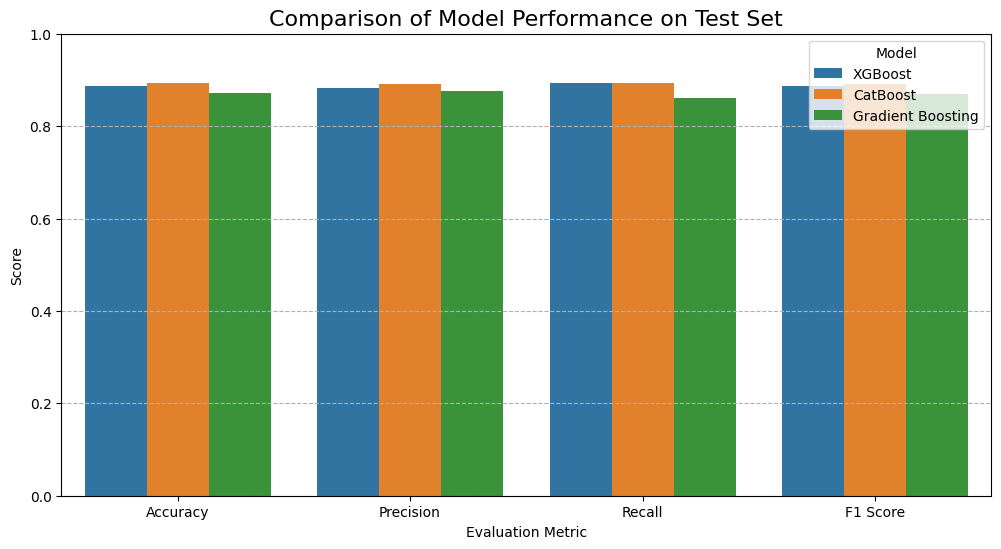

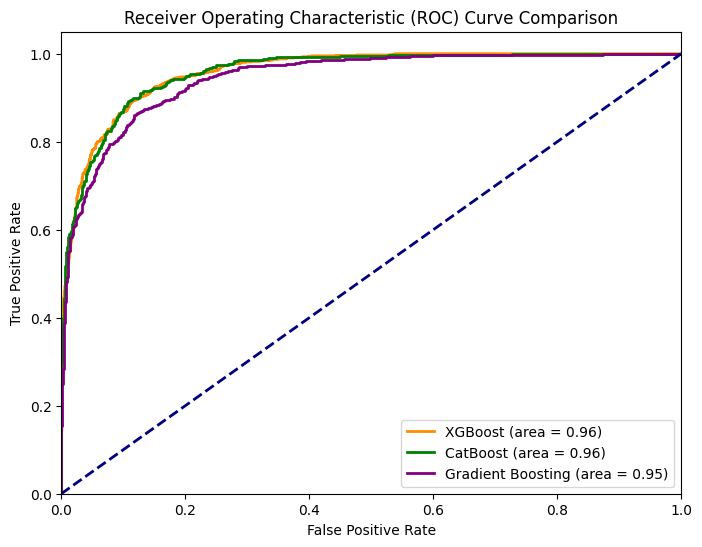

In [ ]:
# Constructs a structured table to arrange and contrast performance outcomes from several systems, making it simple to compare and contrast important evaluation scores side by side.
metrics = pnds.DataFrame({
    'Model': ['XGBoost', 'CatBoost', 'Gradient Boosting'],
    'Accuracy': [accuracy, accuracy_catboost, accuracy_gb],
    'Precision': [precision, precision_catboost, precision_gb],
    'Recall': [recall, recall_catboost, recall_gb],
    'F1 Score': [f1, f1_catboost, f1_gb]
})
# Print a tabular version of the evaluation findings.
print("\nModel Comparison on Test Set:")
print(metrics)

# Reorganize the performance assessment table so that it can be clearly visualized. This way, the scores of each model for each evaluation criterion can be shown as distinct bars in a single chart for efficient comparison.
metrics_melted = metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')
# Provide room for a sizable, aesthetically pleasing chart area that can hold all of the grouped bars and labels without crowding, guaranteeing that the graph is still simple to read and understand.
mplt.figure(figsize=(12, 6))
# To make it easy to identify patterns, advantages, and disadvantages of various algorithms, create a grouped column chart that graphically contrasts the various model performances for each assessment criterion.
sbn.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted)
# Give the graphic a heading that succinctly explains its goal and makes it clear to visitors that it compares various prediction techniques on unobserved data.
mplt.title('Comparison of Model Performance on Test Set', fontsize=16)
# To guarantee that the bar heights accurately reflect variances and that scaling artifacts do not cause misunderstandings, limit the vertical axis scale to the entire range of score values.
mplt.ylim(0, 1)
# Give clarity to the numerical performance outputs being represented by clearly naming the vertical axis and specifying what each column represents.
mplt.ylabel('Score')
# Give the horizontal axis a label that makes it clear what the categories stand for, namely, the many facets of model quality under consideration.
mplt.xlabel('Evaluation Metric')
# Include the title and legend.
mplt.legend(title='Model')
# To enhance visual alignment and make it easier for viewers to determine and compare precise score levels across models for each evaluation category, add horizontal reference lines behind the bars.
mplt.grid(axis='y', linestyle='--')
# Display a clear and succinct visual comparison of each model's performance based on several evaluation criteria by rendering the completed bar chart.
mplt.show()

# To display several model comparisons on a single ROC curve chart, begin by creating a new visual area with the right proportions, making sure there is adequate room for distinct line separation and legends.
mplt.figure(figsize=(8, 6))
# Connect the rate of false alarms and the rate of successful positive identifications across several classification thresholds to create a curve for one of the assessed models. For instant comparison, include the model's performance score.
mplt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (area = {roc_auc:.2f})')
# CatBoost ROC curve plot
mplt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label=f'CatBoost (area = {roc_auc_catboost:.2f})')
# Include an additional curve that illustrates the capacity of a separate algorithm to differentiate between categories under different threshold settings. To prevent misunderstanding, this curve should be displayed in a different color and accompanied by a summary value that indicates the method's overall efficacy.
mplt.plot(fpr_gb, tpr_gb, color='purple', lw=2, label=f'Gradient Boosting (area = {roc_auc_gb:.2f})')

# Provides a baseline against which predictive techniques can be compared.
mplt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Verifies that the horizontal scale covers the entire anticipated output range.
mplt.xlim([0.0, 1.0])
# To prevent visual cutoff, leave a tiny margin above the top.
mplt.ylim([0.0, 1.05])
# Explains what the lower horizontal scale displays.
mplt.xlabel('False Positive Rate')
# Defines the object being measured on the vertical axis.
mplt.ylabel('True Positive Rate')
# Describes the performance that the entire image reflects.
mplt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
# Offers a key to help differentiate between several performance lines.
mplt.legend(loc="lower right")
# Displays the completed graphical output for assessment.
mplt.show()

# Explainable AI Tools

# Shap

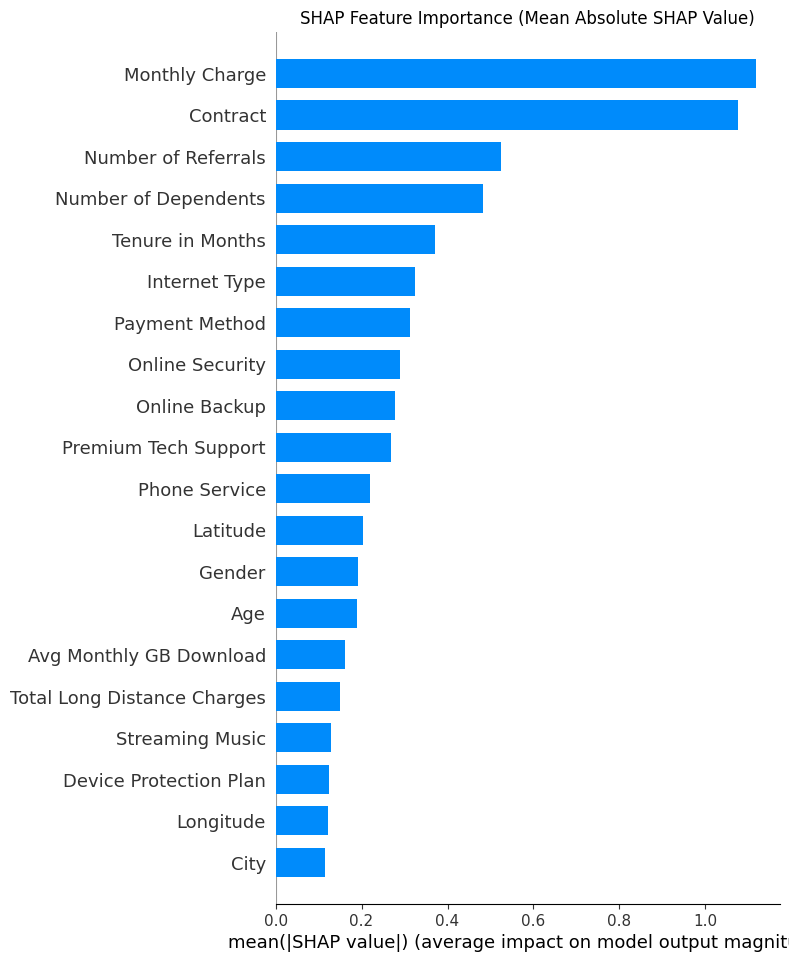

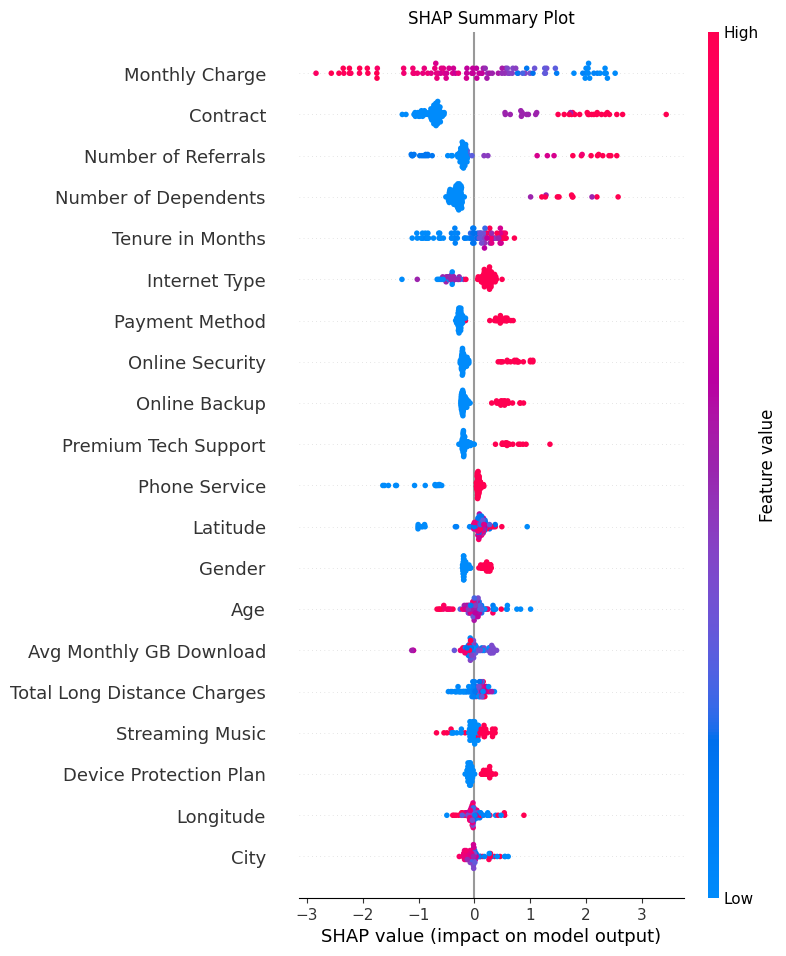

In [ ]:
# Create an interpretation tool to describe the operation of the prediction system.
explainer = shap.TreeExplainer(catboost_model)

# To speed up the interpretability stage, only a small percentage of the data is chosen.
sample_size = 100
# Consistently selects a predetermined number of observations each time.
Churn_X_test_sample = Churn_X_test.sample(n=sample_size, random_state=42)

# This helps interpret which features drive predictions in these situations by calculating the relative contribution of each input factor on the model's decisions on a chosen subset of the test data.
shap_values = explainer.shap_values(Churn_X_test_sample)

# This helps to find the most crucial elements overall by producing a visual ranking of input features according to how strongly they affect the model's output across several scenarios.
shap.summary_plot(shap_values, Churn_X_test_sample, plot_type="bar", show=False)
# Include a header in the bar chart.
mplt.title('SHAP Feature Importance (Mean Absolute SHAP Value)')
mplt.show()

# With color and position reflecting the direction and size of influence across all test cases, this creates a comprehensive picture that demonstrates how the value of each input component influences individual predictions.
shap.summary_plot(shap_values, Churn_X_test_sample, show=False)
# Include a heading for the explanation chart that uses dots.
mplt.title('SHAP Summary Plot')
mplt.show()



# Lime

LIME explanation for instance 0:


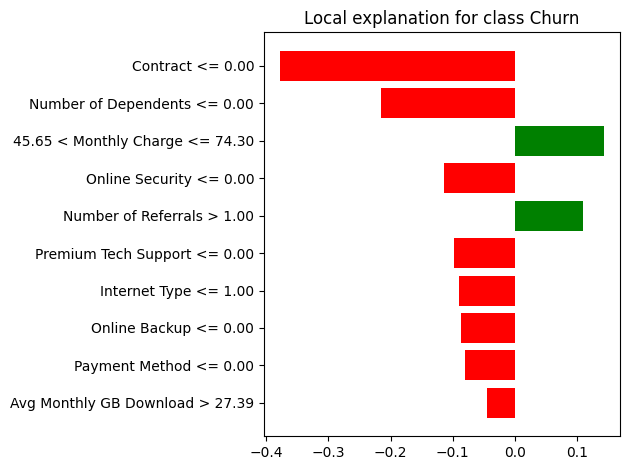

In [ ]:
# By examining comparable cases # from the learning phase, this creates an interpreter that helps comprehend the role of each input aspect in the decision and explains why the model produces particular predictions.
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=Churn_X_train.values,
                                                   feature_names=Churn_X_train.columns.tolist(),
                                                   class_names=['Not Churn', 'Churn'],
                                                   mode='classification')
# To examine how the model arrived at its conclusion for that particular instance, this chooses one data point from the evaluation set.
instance_idx = 0
instance = Churn_X_test.iloc[instance_idx]
# This generates a breakdown that highlights the key components that had the biggest influence on the outcome and demonstrates how the features of the selected sample affected the model's choice.
explanation = explainer.explain_instance(data_row=instance.values,
                                         predict_fn=catboost_model.predict_proba,
                                         num_features=10) # Restrict the output to the top ten authors.
# Present a graphic overview that shows which input components contributed most to the prediction for the chosen scenario.
print(f"LIME explanation for instance {instance_idx}:")
explanation.as_pyplot_figure()
mplt.tight_layout()
mplt.show()